<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Loan Approval Prediction Dataset
</h1>  
     
</div>

<p><center style="color:blue; font-family: 'Dancing Script'; font-size:30px;">🙏🏿Thanks for visiting my notebook 🕺🏿</center></p>

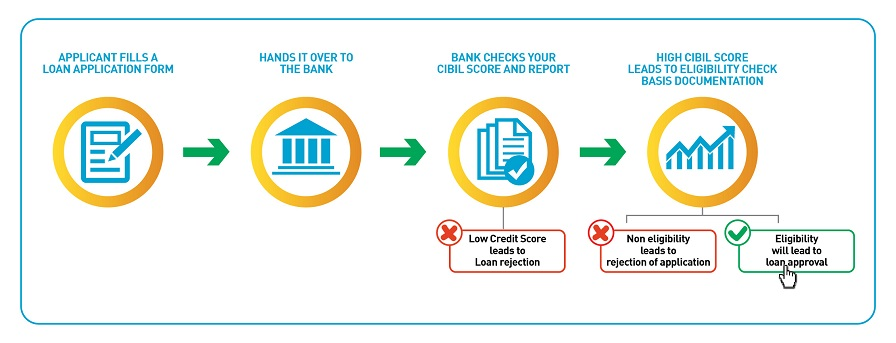

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Competition :</font></h3>
    
**Task**: The goal for this competition is to predict whether an applicant is approved for a loan.

**Evaluation**: Submissions are evaluated using the Area under ROC Cruve.

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: lightgrey; font-size:100%; text-align:left">

<h3 align="center"><font color='black'>💡 Evalaution Metric :</font></h3>
    
    
    
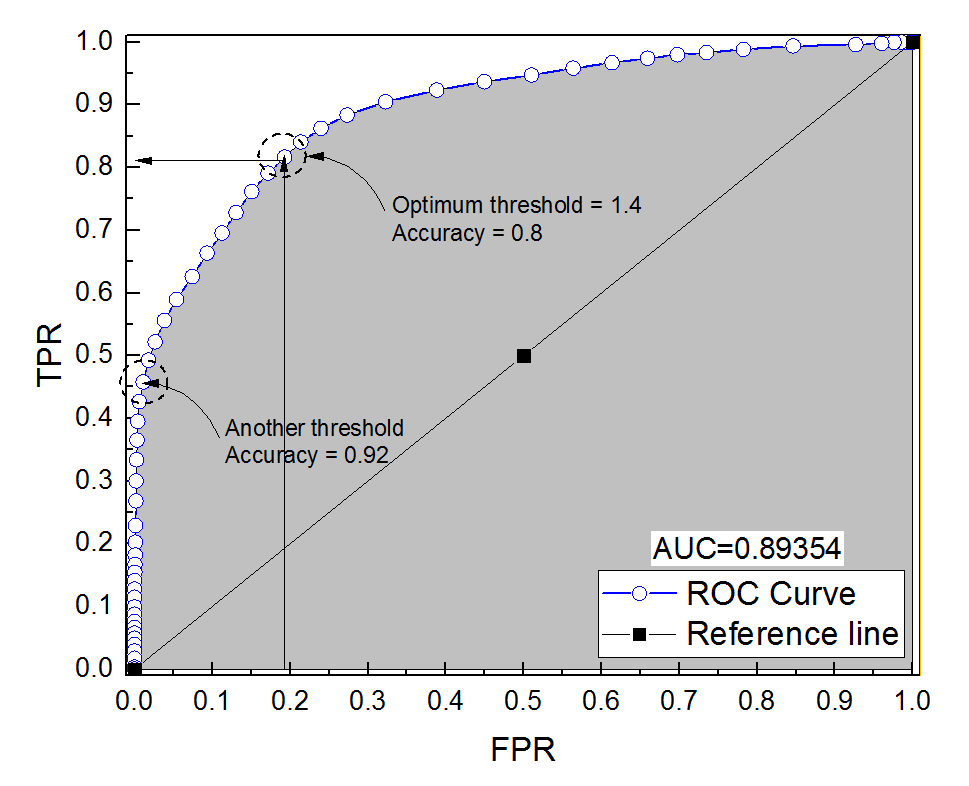




<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">Importing Libraries</h1>  
     
</div>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 About The Packages :</font></h3>
    
🎭we are Importing several Python packages u
    
🧨 Sklearn have,Kfold, mean_squared_error, mean_absolute_error, median_absolute_error.


🥽 XGBoost (eXtreme Gradient Boosting) and LightGBM are both powerful machine learning algorithms used for supervised learning tasks, particularly in the realm of gradient boosting

    
🎍Numpy, Pandas, Matplotlib, Seaborn :NumPy for numerical computing, Pandas for data manipulation, Matplotlib for plotting, and Seaborn for statistical visualization.
    



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from matplotlib.patches import ConnectionPatch

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [ ]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e10/train.csv')
df_test  = pd.read_csv('/kaggle/input/playground-series-s4e10/test.csv')
df_sub = pd.read_csv('/kaggle/input/playground-series-s4e10/sample_submission.csv')

In [ ]:
df_train.head()

In [ ]:
df_train.describe()

In [ ]:
df_test.head()

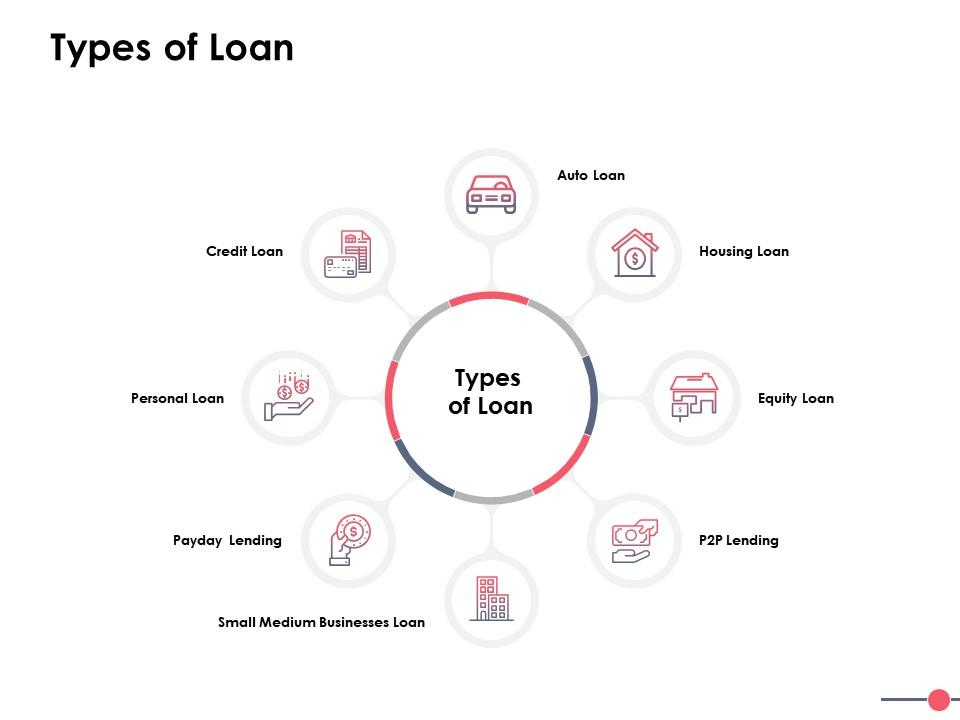

In [ ]:
df_sub.head()

In [ ]:
df_train = df_train.drop(columns=['id'])
df_test = df_test.drop(columns=['id'])

In [ ]:
df_train.shape,df_test.shape

In [ ]:
df_train.isnull().sum()

In [ ]:
df_test.isnull().sum()

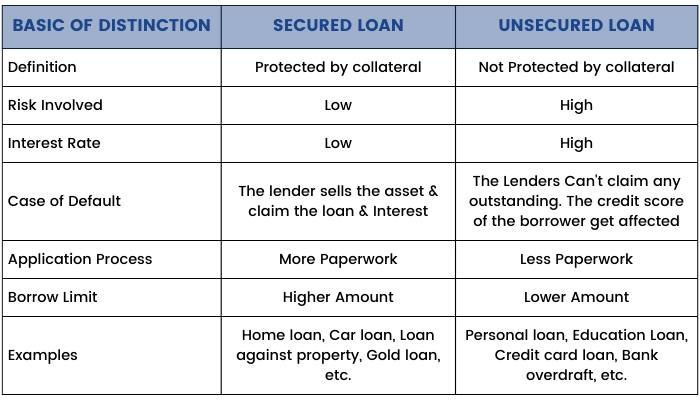

In [ ]:
df_train.info()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚠🍜Exploratory Data Analysis♒🌊</h1>  
     
</div>

In [ ]:
df_train.columns

In [ ]:
def stacked_bar_plot(df, feature, target='loan_status'):
    crosstab = pd.crosstab(df[feature], df[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='coolwarm')
    plt.title(f'Stacked Bar Plot of {feature} vs {target}')
    plt.ylabel('Proportion')
    plt.show()
stacked_bar_plot(df_train, 'loan_intent')

In [ ]:
stacked_bar_plot(df_train, 'person_home_ownership')

In [ ]:
def plot_histograms(df, columns):
    df[columns].hist(bins=20, figsize=(15, 10), color='skyblue')
    plt.suptitle('Histograms of Numerical Features', fontsize=16)
    plt.show()

plot_histograms(df_train, ['person_age', 'person_income', 'loan_amnt'])

In [ ]:
def plot_boxplots(df, columns):
    plt.figure(figsize=(12, 6))
    for i, col in enumerate(columns, 1):
        plt.subplot(1, len(columns), i)
        sns.boxplot(y=df[col], color='lightblue')
        plt.title(f'Box Plot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df_train, ['person_income', 'loan_amnt'])

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_train, x='person_age', y='person_income', hue='loan_status', palette='Set1')
plt.title('person_age vs. person_income by Loan')
plt.xlabel('person_age')
plt.ylabel('person_income')
plt.legend(title='Personal_Loan')
plt.gcf().set_facecolor('lightgrey') 
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train[df_train['loan_status'] == 1]['loan_amnt'], label='Default', fill=True)
sns.kdeplot(df_train[df_train['loan_status'] == 0]['loan_amnt'], label='Non-Default', fill=True)
plt.title('CDF of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='loan_grade', y='loan_amnt', hue='loan_status', data=df_train, estimator=np.mean)
plt.title('Average Loan Amount by Loan Grade and Status')
plt.xlabel('Loan Grade')
plt.ylabel('Average Loan Amount')
plt.legend(title='Loan Status')
plt.show()


In [ ]:
num_features = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_train[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', data=df_train)
plt.title('Distribution of Target Variable (Loan Status)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [ ]:
df_train.hist(figsize=(12, 10), color='skyblue', edgecolor='black')
plt.gcf().set_facecolor('yellow')
plt.tight_layout()
plt.show()

In [ ]:
subset_features = ['loan_amnt', 'loan_int_rate', 'person_income', 'person_age', 'loan_status']
sns.pairplot(df_train[subset_features], hue='loan_status')
plt.title('Pair Plot of Selected Features')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

def preprocess_data(df_train, df_test):  
    label_enc = LabelEncoder()   
    label_cols = ['person_home_ownership', 'loan_grade', 'cb_person_default_on_file']    
    for col in label_cols:
        df_train[col] = label_enc.fit_transform(df_train[col])
        df_test[col] = label_enc.transform(df_test[col])    
    df_train = pd.get_dummies(df_train, columns=['loan_intent'], drop_first=True)
    df_test = pd.get_dummies(df_test, columns=['loan_intent'], drop_first=True) 
    target_col = 'loan_status'
    train_columns = df_train.drop(columns=[target_col]).columns    
    df_test = df_test.reindex(columns=train_columns, fill_value=0)    
    return df_train, df_test

df_train_processed, df_test_processed = preprocess_data(df_train, df_test)

In [ ]:
df_train = df_train_processed
df_test = df_test_processed

In [ ]:
df_train.shape,df_test.shape

In [ ]:
correlation_matrix = df_train.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.2)
plt.gcf().set_facecolor('#00FFFF')  
plt.title('Correlation Matrix')
plt.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: white; font-size:100%; text-align:left">

<h3 align="center"><font color='#DAA520'>💡 Observation from above plot :</font></h3>
    
    

    

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Regression Analysis♒🌊</h1>  
     
</div>

In [ ]:
df_train.columns

In [ ]:
df_test.isnull().sum()

In [ ]:
y = df_train['loan_status'] 
df_train = df_train.drop(['loan_status'],axis=1)
X = df_train

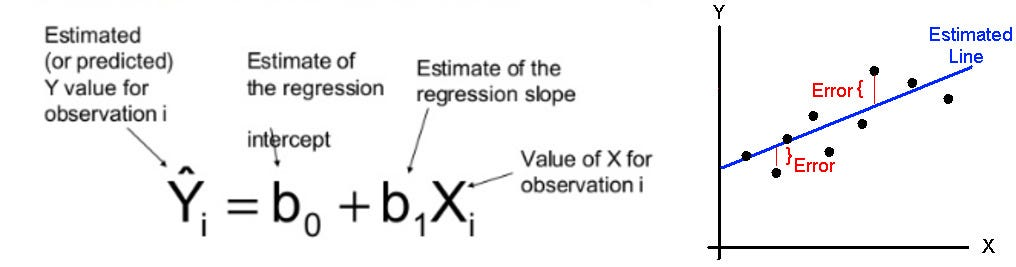

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Algorithm Which requires Scaling♒🌊</h1>  
     
</div>

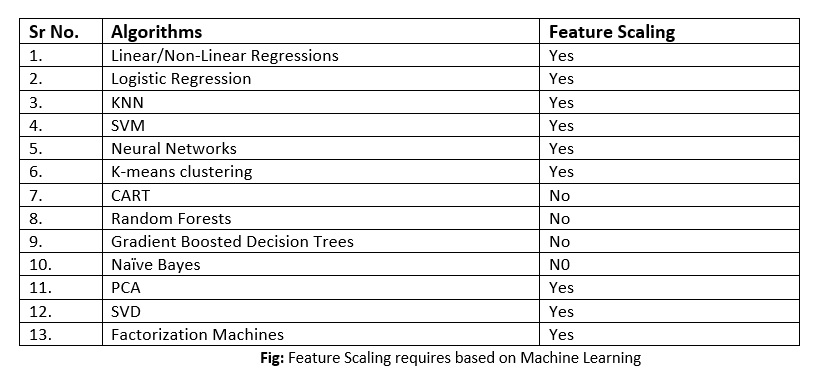

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_train_data = df_train
scaled_test_data = df_test

In [ ]:
df_train.columns

In [ ]:
df_test.info()

In [ ]:
xgb_params = {
    'n_estimators': 600,
    'max_depth': 10,
    'learning_rate': 0.06,
    'random_state': 42,
    
    'eval_metric': 'auc'
}

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

xgb_predictions = np.zeros(len(scaled_train_data))
xgb_true_labels = np.zeros(len(scaled_train_data))
xgb_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    xgb_model = XGBClassifier(**xgb_params)

    xgb_model.fit(X_train, y_train,
                  eval_set=[(X_train, y_train), (X_val, y_val)],
                  early_stopping_rounds=10,
                  verbose=100)
    xgb_fold_preds = xgb_model.predict_proba(X_val)[:, 1] 
    xgb_fold_test_preds = xgb_model.predict_proba(scaled_test_data)[:, 1]
    xgb_predictions[val_idx] = xgb_fold_preds
    xgb_true_labels[val_idx] = y_val
    xgb_test_predictions += xgb_fold_test_preds / n_splits

overall_auc_xgb = roc_auc_score(xgb_true_labels, xgb_predictions)
print("Overall AUC (XGBClassifier):", overall_auc_xgb)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for XGboost♒🌊</h1>  
     
</div>

In [ ]:
from xgboost import plot_importance

xgb_residuals = xgb_predictions - xgb_true_labels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))


axes[0, 0].scatter(xgb_predictions, xgb_residuals, color='blue', alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residual Plot (XGBoost)')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True)

axes[0, 1].scatter(xgb_true_labels, xgb_predictions, color='blue', alpha=0.5)
axes[0, 1].plot([min(xgb_true_labels), max(xgb_true_labels)], [min(xgb_true_labels), max(xgb_true_labels)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted Plot (XGBoost)')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].grid(True)


plot_importance(xgb_model, ax=axes[1, 0])
axes[1, 0].set_title('Feature Importance (XGBoost)')


axes[1, 1].hist(xgb_residuals, bins=30, color='blue', alpha=0.5)
axes[1, 1].set_title('Residual Distribution (XGBoost)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)

plt.gcf().set_facecolor('cyan')
plt.tight_layout()
plt.show()


In [ ]:
catboost_params = {
    'loss_function':'Logloss',
        'eval_metric':'AUC',
        'learning_rate':0.05,
        'iterations':5000,
        'depth':12,        
        'l2_leaf_reg':0.6, 
}

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

catboost_predictions = np.zeros(len(scaled_train_data))
catboost_true_labels = np.zeros(len(scaled_train_data))
catboost_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    catboost_model = CatBoostClassifier(**catboost_params)

    catboost_model.fit(X_train, y_train,
                       eval_set=(X_val, y_val),
                       early_stopping_rounds=10,
                       verbose=False)
  
    catboost_fold_preds = catboost_model.predict_proba(X_val)[:, 1] 
    catboost_fold_test_preds = catboost_model.predict_proba(scaled_test_data)[:, 1]

    catboost_predictions[val_idx] = catboost_fold_preds
    catboost_true_labels[val_idx] = y_val
    catboost_test_predictions += catboost_fold_test_preds / n_splits

overall_metric_catboost = roc_auc_score(catboost_true_labels, catboost_predictions)
print("Overall AUC (CatBoostClassifier):", overall_metric_catboost)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for catboost♒🌊</h1>  
     
</div>

In [ ]:
catboost_residuals = catboost_predictions - catboost_true_labels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))


axes[0, 0].scatter(catboost_predictions, catboost_residuals, color='blue', alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residual Plot (CatBoost)')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True)


axes[0, 1].scatter(catboost_true_labels, catboost_predictions, color='blue', alpha=0.5)
axes[0, 1].plot([min(catboost_true_labels), max(catboost_true_labels)], [min(catboost_true_labels), max(catboost_true_labels)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted Plot (CatBoost)')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].grid(True)


catboost_model.get_feature_importance(prettified=True).plot(kind='bar', x='Feature Id', y='Importances', ax=axes[1, 0])
axes[1, 0].set_title('Feature Importance (CatBoost)')
axes[1, 0].set_xlabel('Feature')
axes[1, 0].set_ylabel('Importance')


axes[1, 1].hist(catboost_residuals, bins=30, color='blue', alpha=0.5)
axes[1, 1].set_title('Residual Distribution (CatBoost)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)
plt.gcf().set_facecolor('cyan')
plt.tight_layout()
plt.show()


In [ ]:
from lightgbm import LGBMClassifier
lgb_params = {
    'objective': 'binary',
        'n_estimators': 3000,
        'metric': 'binary_logloss',
        'boosting_type': 'gbdt',
        'random_state': 42,
        'learning_rate':0.0322942967545754,
        'num_leaves': 24,
        'max_depth': 15,
        'min_data_in_leaf': 25,
        'feature_fraction': 0.6236144085285287,
        'bagging_fraction': 0.9596685778433888,
        'bagging_freq': 3,      
        'verbose' : -1
}

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

lgbm_predictions = np.zeros(len(scaled_train_data))
lgbm_true_labels = np.zeros(len(scaled_train_data))
lgbm_test_predictions = np.zeros(len(scaled_test_data))

for fold, (train_idx, val_idx) in enumerate(kf.split(scaled_train_data, y)):
    X_train, X_val = scaled_train_data.iloc[train_idx], scaled_train_data.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]  
    lgbm_model = LGBMClassifier(**lgb_params)
    lgbm_model.fit(X_train, y_train,
                   eval_set=[(X_val, y_val)],
                   eval_metric='auc',  
                   early_stopping_rounds=10,
                   verbose=False)
    
    lgbm_fold_preds = lgbm_model.predict_proba(X_val)[:, 1]  
    lgbm_fold_test_preds = lgbm_model.predict_proba(scaled_test_data)[:, 1]
    lgbm_predictions[val_idx] = lgbm_fold_preds
    lgbm_true_labels[val_idx] = y_val
    lgbm_test_predictions += lgbm_fold_test_preds / n_splits

overall_metric_lgbm = roc_auc_score(lgbm_true_labels, lgbm_predictions)
print("Overall AUC (LGBMClassifier):", overall_metric_lgbm)

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🎇🌭Plots from results for lightgbm♒🌊</h1>  
     
</div>

In [ ]:
from lightgbm import plot_importance

lgbm_residuals = lgbm_predictions - lgbm_true_labels
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))

axes[0, 0].scatter(lgbm_predictions, lgbm_residuals, color='blue', alpha=0.5)
axes[0, 0].axhline(y=0, color='red', linestyle='--')
axes[0, 0].set_title('Residual Plot (LGBMRegressor)')
axes[0, 0].set_xlabel('Predicted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].grid(True)


axes[0, 1].scatter(lgbm_true_labels, lgbm_predictions, color='blue', alpha=0.5)
axes[0, 1].plot([min(lgbm_true_labels), max(lgbm_true_labels)], [min(lgbm_true_labels), max(lgbm_true_labels)], color='red', linestyle='--')
axes[0, 1].set_title('Actual vs. Predicted Plot (LGBMRegressor)')
axes[0, 1].set_xlabel('Actual Values')
axes[0, 1].set_ylabel('Predicted Values')
axes[0, 1].grid(True)

plot_importance(lgbm_model, ax=axes[1, 0], figsize=(10, 6))
axes[1, 0].set_title('Feature Importance (LGBMRegressor)')

axes[1, 1].hist(lgbm_residuals, bins=30, color='blue', alpha=0.5)
axes[1, 1].set_title('Residual Distribution (LGBMRegressor)')
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True)
plt.gcf().set_facecolor('#00FFFF')
plt.tight_layout()
plt.show()

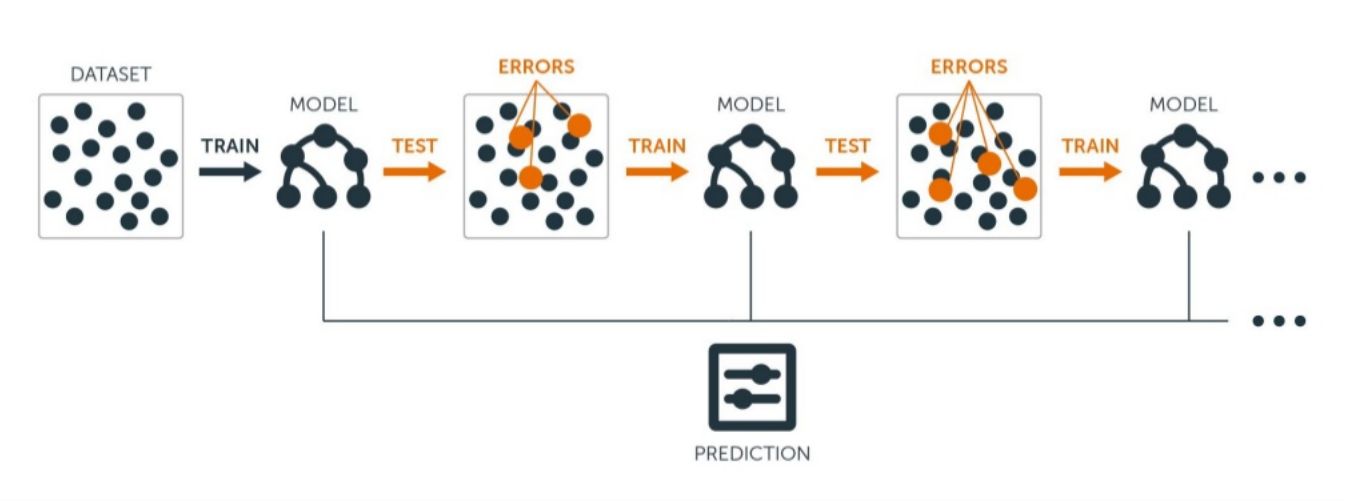

In [ ]:
df_sub.head()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">⚒🌊How well The prediction fit♒🌊</h1>  
     
</div>

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(lgbm_test_predictions, bins=50, alpha=0.5, color='green', label='LGBM Predictions')
plt.hist(xgb_test_predictions, bins=50, alpha=0.5, color='red', label='XGB Predictions')
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Status Predictions')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr_lgbm, tpr_lgbm, _ = roc_curve(lgbm_true_labels, lgbm_predictions)
roc_auc_lgbm = auc(fpr_lgbm, tpr_lgbm)

fpr_catboost, tpr_catboost, _ = roc_curve(catboost_true_labels, catboost_predictions)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

plt.figure(figsize=(10, 6))
plt.plot(fpr_lgbm, tpr_lgbm, color='blue', lw=2, label=f'LightGBM ROC Curve (AUC = {roc_auc_lgbm:.4f})')
plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost ROC Curve (AUC = {roc_auc_catboost:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

<div class="alert alert-success">  
    <h1 align="center" style="color:darkgoldenrod;">🗞📜Final Submission♒🌊</h1>  
     
</div>

In [ ]:
df_sub['loan_status'] = lgbm_test_predictions *0.45 + catboost_test_predictions*0.1 + xgb_test_predictions*0.45

In [ ]:
df_sub.head()

In [ ]:
df_sub.to_csv('submission.csv', index=False)

<div class="alert alert-success"> 
        <h1 align="center" style="color:chocolate;">Looking Forward for feeback </h1>  
     
</div>

<a id="1.4"></a>
## <div style="box-shadow: rgba(0, 0, 0, 0.18) 0px 2px 4px inset; padding:20px; font-size:24px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(67, 66, 66)"> <b>  Refrences</b></div>

<div style="background-color: black; padding: 20px; border-radius: 10px; margin: 20px auto; max-width: 600px;">
    <center>
        <div style="background-color: white; padding: 20px; border-radius: 10px;">
            <b style="font-size: 24px; color: #ff6600;">👏😊 &nbsp; IF YOU FIND THIS HELPFUL, PLEASE UPVOTE! &nbsp; 💢👏</b>
            <div style="margin-top: 20px; font-size: 18px; color: black;">
                🥽🖥This took quite a bit of effort on my part, and while it might seem trivial, 🏆🏆receiving your appreciation means a lot to me! 😅🎃 Your upvotes inspire me to keep creating helpful content like this🖥🍱.                    
            </div>
        </div>
    </center>
</div>